### This scripts takes about 4 minutes seconds to execute

In [159]:
from tqdm.notebook import tqdm, trange
from importlib import reload
import horseracinglib
reload(horseracinglib)
from horseracinglib import *
pd.options.display.max_columns = None

# Load test data (not seen by models)

In [160]:
runners = pd.read_csv('data\\runners_test.csv', parse_dates=['meeting_date'], infer_datetime_format=True)
runners.sort_values(by=['race_id', 'runner_id'], inplace=True)
runners.head()

,runner_id,race_id,meeting_date,stall_number,gender,age,trainer_id,trainer_sr,sire_id,sire_sr,dam_id,dam_sr,finpos,win,win_perc,sp,mkt_prob,overage,adj_mkt_prob,blinkers,visor,cheekpieces,tonguetie,entire,gelding,daysLTO,position1,position2,position3,position1_1,position1_2,position1_3,position1_4,position2_1,position2_2,position2_3,position2_4,position3_1,position3_2,position3_3,position3_4
788,696863,500812,2014-02-01,5,G,9,18334,0.131833,57278,0.0,1278305,0.0,4,0,0.173913,1.57,0.636943,1.12057,0.568409,0,0,0,1,0,1,8,1,1,2,1,0,0,0,1,0,0,0,0,1,0,0
1620,760268,500812,2014-02-01,6,G,8,101808,0.095238,51945,0.0,298012,0.0,5,0,0.090909,21.00,0.047619,1.12057,0.042495,1,0,0,0,0,1,8,4,4,0,0,0,0,1,0,0,0,1,0,0,0,0
2452,1430418,500812,2014-02-01,2,G,8,6170,0.127783,10117,0.0,251852,0.0,1,1,0.222222,3.50,0.285714,1.12057,0.254972,0,0,0,0,0,1,47,4,4,1,0,0,0,1,0,0,0,1,1,0,0,0
3039,1453673,500812,2014-02-01,1,G,7,10798,0.137195,133362,0.0,144850,0.0,3,0,0.142857,13.00,0.076923,1.12057,0.068646,0,1,0,0,0,1,15,4,1,4,0,0,0,1,1,0,0,0,0,0,0,1
3669,1494633,500812,2014-02-01,3,G,7,18334,0.131833,458268,0.0,209677,0.0,0,0,0.250000,18.60,0.053763,1.12057,0.047979,0,0,0,0,0,1,12,1,1,4,1,0,0,0,1,0,0,0,0,0,0,1


In [161]:
runners_single_race = runners[runners.race_id == 500812]
runners_single_race

,runner_id,race_id,meeting_date,stall_number,gender,age,trainer_id,trainer_sr,sire_id,sire_sr,dam_id,dam_sr,finpos,win,win_perc,sp,mkt_prob,overage,adj_mkt_prob,blinkers,visor,cheekpieces,tonguetie,entire,gelding,daysLTO,position1,position2,position3,position1_1,position1_2,position1_3,position1_4,position2_1,position2_2,position2_3,position2_4,position3_1,position3_2,position3_3,position3_4
788,696863,500812,2014-02-01,5,G,9,18334,0.131833,57278,0.0,1278305,0.0,4,0,0.173913,1.57,0.636943,1.12057,0.568409,0,0,0,1,0,1,8,1,1,2,1,0,0,0,1,0,0,0,0,1,0,0
1620,760268,500812,2014-02-01,6,G,8,101808,0.095238,51945,0.0,298012,0.0,5,0,0.090909,21.00,0.047619,1.12057,0.042495,1,0,0,0,0,1,8,4,4,0,0,0,0,1,0,0,0,1,0,0,0,0
2452,1430418,500812,2014-02-01,2,G,8,6170,0.127783,10117,0.0,251852,0.0,1,1,0.222222,3.50,0.285714,1.12057,0.254972,0,0,0,0,0,1,47,4,4,1,0,0,0,1,0,0,0,1,1,0,0,0
3039,1453673,500812,2014-02-01,1,G,7,10798,0.137195,133362,0.0,144850,0.0,3,0,0.142857,13.00,0.076923,1.12057,0.068646,0,1,0,0,0,1,15,4,1,4,0,0,0,1,1,0,0,0,0,0,0,1
3669,1494633,500812,2014-02-01,3,G,7,18334,0.131833,458268,0.0,209677,0.0,0,0,0.250000,18.60,0.053763,1.12057,0.047979,0,0,0,0,0,1,12,1,1,4,1,0,0,0,1,0,0,0,0,0,0,1
4239,1531212,500812,2014-02-01,4,G,6,10614,0.054632,260301,0.0,215679,0.0,2,0,0.095238,51.00,0.019608,1.12057,0.017498,0,0,0,0,0,1,10,4,1,4,0,0,0,1,1,0,0,0,0,0,0,1


# Demonstrate calculating model probabilities for single race

In [162]:
my_multinomial_logit = MultinomialLogitModel('models\\multinomial_logit_coefficients.csv', model_prefix='ML')
display(my_multinomial_logit.model_coefficients)
my_multinomial_logit.calculate_model_probabilities_for_single_race(runners_single_race)

,feature,coefficient
0,age,-0.027801
1,trainer_sr,5.300271
2,daysLTO,-0.000583
3,position1_1,0.548396
4,position1_2,0.539932
5,position1_3,0.324656
6,position1_4,-0.218123
7,position2_1,0.202110
8,position2_2,0.180563
9,position2_3,0.087636


,race_id,runner_id,stall_number,win,mod_prob
788,500812,696863,5,0,0.288915
1620,500812,760268,6,0,0.076942
2452,500812,1430418,2,1,0.109100
3039,500812,1453673,1,0,0.139589
3669,500812,1494633,3,0,0.292526
4239,500812,1531212,4,0,0.092927


In [163]:
my_random_choice = RandomChoiceModel(model_prefix='RC')
display(my_random_choice.model_coefficients)
my_random_choice.calculate_model_probabilities_for_single_race(runners_single_race)

None

,race_id,runner_id,stall_number,win,mod_prob
788,500812,696863,5,0,0.158058
1620,500812,760268,6,0,0.120459
2452,500812,1430418,2,1,0.090693
3039,500812,1453673,1,0,0.328763
3669,500812,1494633,3,0,0.216202
4239,500812,1531212,4,0,0.085825


In [164]:
my_favourite_choice = FavouriteChoiceModel(model_prefix='FC')
display(my_favourite_choice.model_coefficients)
my_favourite_choice.calculate_model_probabilities_for_single_race(runners_single_race)

None

,race_id,runner_id,stall_number,win,mod_prob
788,500812,696863,5,0,0.568409
1620,500812,760268,6,0,0.042495
2452,500812,1430418,2,1,0.254972
3039,500812,1453673,1,0,0.068646
3669,500812,1494633,3,0,0.047979
4239,500812,1531212,4,0,0.017498


# Demonstrate calculating model probabilities for multiple races

In [165]:
my_multinomial_logit.calculate_model_probabilities_for_multiple_races(runners)
my_multinomial_logit.model_probabilities.head()

,race_id,runner_id,stall_number,win,mod_prob
0,500812,696863,5,0,0.288915
1,500812,760268,6,0,0.076942
2,500812,1430418,2,1,0.109100
3,500812,1453673,1,0,0.139589
4,500812,1494633,3,0,0.292526


In [166]:
my_random_choice.calculate_model_probabilities_for_multiple_races(runners)
my_random_choice.model_probabilities.head()

,race_id,runner_id,stall_number,win,mod_prob
0,500812,696863,5,0,0.156233
1,500812,760268,6,0,0.274242
2,500812,1430418,2,1,0.037090
3,500812,1453673,1,0,0.085086
4,500812,1494633,3,0,0.184738


In [167]:
my_favourite_choice.calculate_model_probabilities_for_multiple_races(runners)
my_favourite_choice.model_probabilities.head()

,race_id,runner_id,stall_number,win,mod_prob
0,500812,696863,5,0,0.568409
1,500812,760268,6,0,0.042495
2,500812,1430418,2,1,0.254972
3,500812,1453673,1,0,0.068646
4,500812,1494633,3,0,0.047979


# Calculate model accuracy

In [168]:
my_multinomial_logit.calculate_model_accuracy(runners)

0.23601555489081663

In [169]:
my_random_choice.calculate_model_accuracy(runners)

0.12084953634460066

In [170]:
my_favourite_choice.calculate_model_accuracy(runners)

0.3640442716123243

# Demonstrate probability model assessment

In [171]:
my_model_assessment = ProbabilityModelAssessment([my_multinomial_logit, my_random_choice, my_favourite_choice], runners[['race_id', 'runner_id', 'stall_number', 'win', 'adj_mkt_prob']])
display(my_model_assessment.assessment)
my_model_assessment.perform_assessment()

,race_id,runner_id,stall_number,win,adj_mkt_prob,ML_mod_prob,RC_mod_prob,FC_mod_prob
0,500812,696863,5,0,0.568409,0.288915,0.156233,0.568409
1,500812,760268,6,0,0.042495,0.076942,0.274242,0.042495
2,500812,1430418,2,1,0.254972,0.109100,0.037090,0.254972
3,500812,1453673,1,0,0.068646,0.139589,0.085086,0.068646
4,500812,1494633,3,0,0.047979,0.292526,0.184738,0.047979
...,...,...,...,...,...,...,...,...
31409,619008,2068719,10,0,0.035416,0.067727,0.027510,0.035416
31410,619008,2072533,3,0,0.039986,0.051757,0.106983,0.039986
31411,619008,2106312,4,0,0.082637,0.071175,0.096070,0.082637
31412,619008,2120288,13,0,0.011100,0.103377,0.049928,0.011100


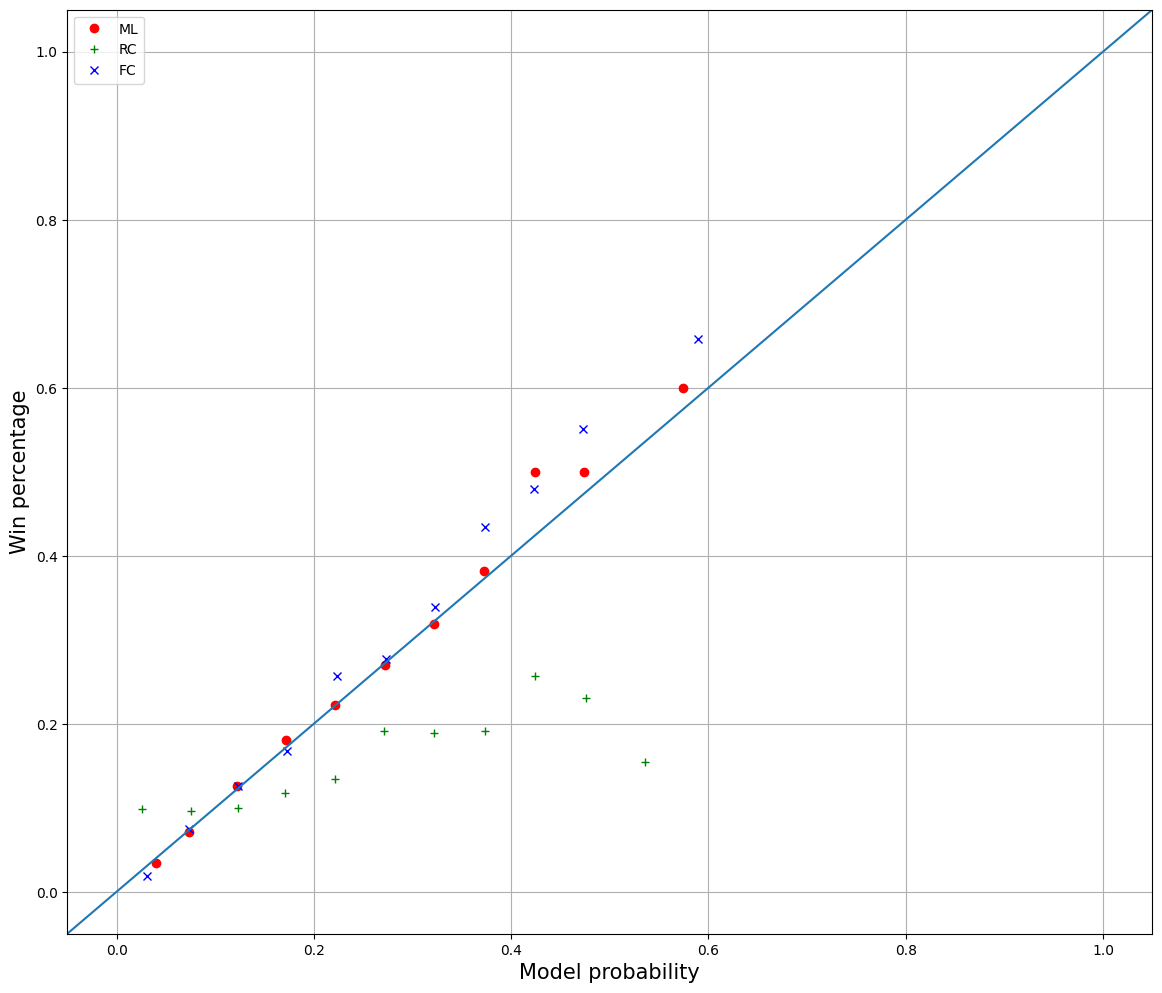

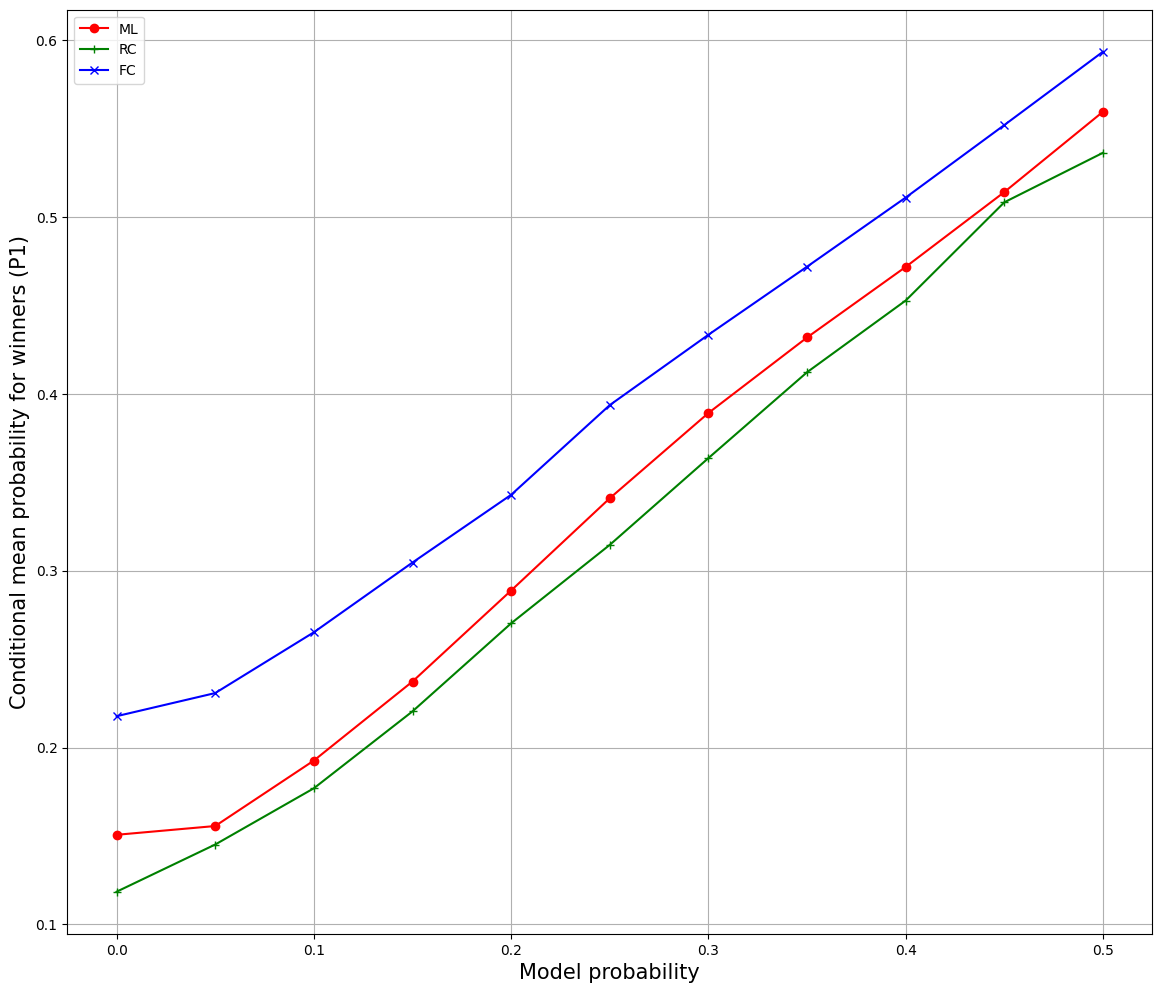

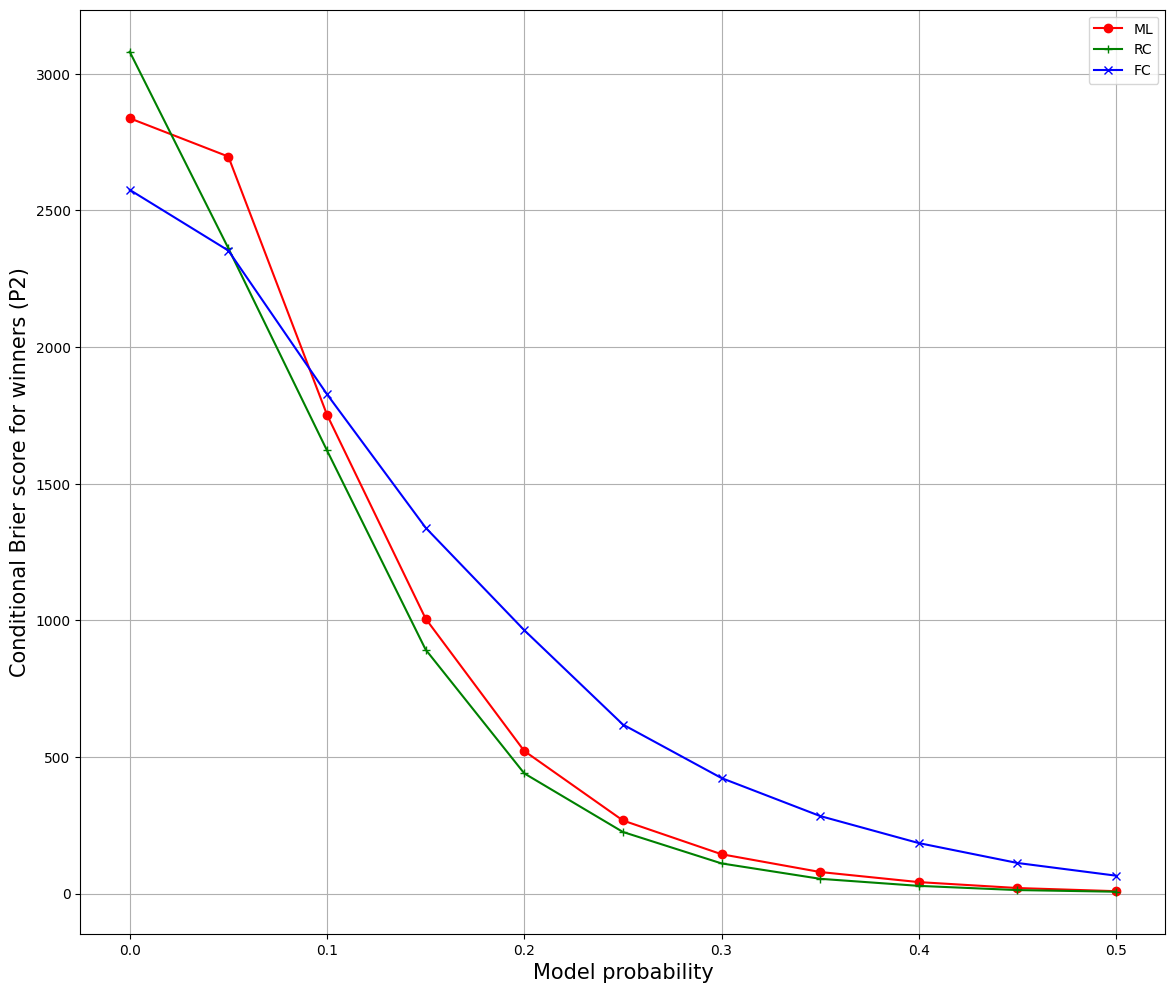

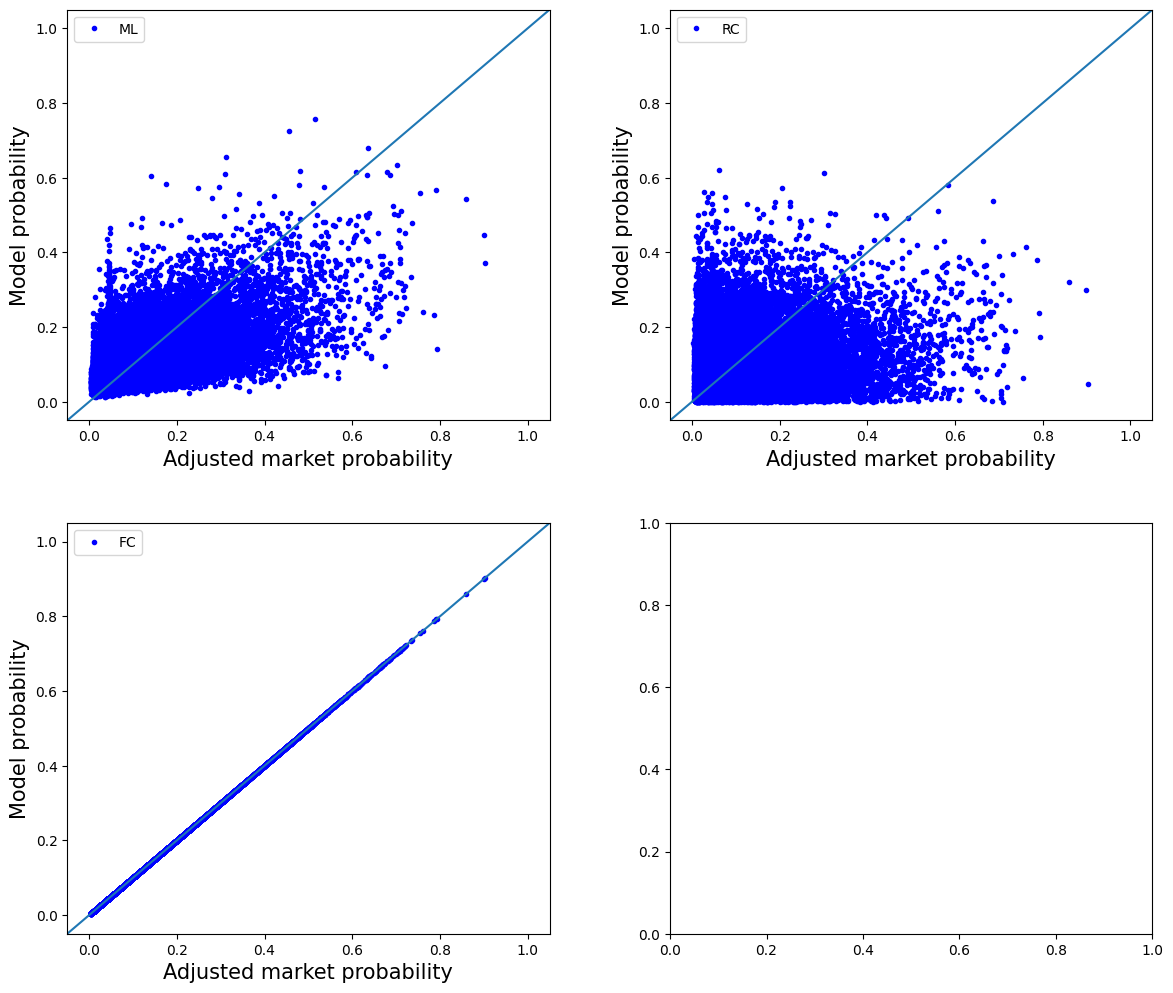

In [172]:
my_model_assessment.show_diagnostic_plots()

# Demonstrate calculating wagering strategy payoffs for single race

In [173]:
def pick_hi_mod_prob(augmented_runners_single_race):
    stakes = pd.Series(np.full(len(augmented_runners_single_race), 0, np.float64), index=augmented_runners_single_race.index)
    max_mod_prob = np.max(augmented_runners_single_race.mod_prob)
    i = augmented_runners_single_race[augmented_runners_single_race.mod_prob == max_mod_prob].index[0]
    stakes[i] = 1
    return stakes

def pick_cond(augmented_runners_single_race):
    return 1 * ((augmented_runners_single_race.mod_prob > 0.15) & (augmented_runners_single_race.mod_prob / augmented_runners_single_race.adj_mkt_prob > 0.13))

In [174]:
my_1st_strategy = WageringStrategy(my_multinomial_logit, pick_hi_mod_prob, 'PickHiModProb')
my_1st_strategy.calculate_strategy_stakes_and_payoffs_for_single_race(runners_single_race)

,race_id,runner_id,stall_number,sp,win,mod_prob,strat_stake,strat_payoff
0,500812,696863,5,1.57,0,0.288915,0.0,0.0
1,500812,760268,6,21.00,0,0.076942,0.0,0.0
2,500812,1430418,2,3.50,1,0.109100,0.0,0.0
3,500812,1453673,1,13.00,0,0.139589,0.0,0.0
4,500812,1494633,3,18.60,0,0.292526,1.0,0.0
5,500812,1531212,4,51.00,0,0.092927,0.0,0.0


In [175]:
my_2nd_strategy = WageringStrategy(my_random_choice, pick_hi_mod_prob, 'PickHiModProb')
my_2nd_strategy.calculate_strategy_stakes_and_payoffs_for_single_race(runners_single_race)

,race_id,runner_id,stall_number,sp,win,mod_prob,strat_stake,strat_payoff
0,500812,696863,5,1.57,0,0.302273,1.0,0.0
1,500812,760268,6,21.00,0,0.287351,0.0,0.0
2,500812,1430418,2,3.50,1,0.120148,0.0,0.0
3,500812,1453673,1,13.00,0,0.021192,0.0,0.0
4,500812,1494633,3,18.60,0,0.225872,0.0,0.0
5,500812,1531212,4,51.00,0,0.043165,0.0,0.0


In [176]:
my_3rd_strategy = WageringStrategy(my_favourite_choice, pick_hi_mod_prob, 'PickHiModProb')
my_3rd_strategy.calculate_strategy_stakes_and_payoffs_for_single_race(runners_single_race)

,race_id,runner_id,stall_number,sp,win,mod_prob,strat_stake,strat_payoff
0,500812,696863,5,1.57,0,0.568409,1.0,0.0
1,500812,760268,6,21.00,0,0.042495,0.0,0.0
2,500812,1430418,2,3.50,1,0.254972,0.0,0.0
3,500812,1453673,1,13.00,0,0.068646,0.0,0.0
4,500812,1494633,3,18.60,0,0.047979,0.0,0.0
5,500812,1531212,4,51.00,0,0.017498,0.0,0.0


In [177]:
my_4th_strategy = WageringStrategy(my_multinomial_logit, pick_cond, 'PickCond')
my_4th_strategy.calculate_strategy_stakes_and_payoffs_for_single_race(runners_single_race)

,race_id,runner_id,stall_number,sp,win,mod_prob,strat_stake,strat_payoff
0,500812,696863,5,1.57,0,0.288915,1,0.0
1,500812,760268,6,21.00,0,0.076942,0,0.0
2,500812,1430418,2,3.50,1,0.109100,0,0.0
3,500812,1453673,1,13.00,0,0.139589,0,0.0
4,500812,1494633,3,18.60,0,0.292526,1,0.0
5,500812,1531212,4,51.00,0,0.092927,0,0.0


# Demonstrate calculating wagering strategy payoffs for multiple races

In [178]:
my_1st_strategy.calculate_strategy_stakes_and_payoffs_for_multiple_races(runners)
my_1st_strategy.strategy_stakes_and_payoffs.head()

,race_id,runner_id,stall_number,sp,win,mod_prob,strat_stake,strat_payoff
0,500812,696863,5,1.57,0,0.288915,0.0,0.0
1,500812,760268,6,21.00,0,0.076942,0.0,0.0
2,500812,1430418,2,3.50,1,0.109100,0.0,0.0
3,500812,1453673,1,13.00,0,0.139589,0.0,0.0
4,500812,1494633,3,18.60,0,0.292526,1.0,0.0


In [179]:
my_2nd_strategy.calculate_strategy_stakes_and_payoffs_for_multiple_races(runners)
my_2nd_strategy.strategy_stakes_and_payoffs.head()

,race_id,runner_id,stall_number,sp,win,mod_prob,strat_stake,strat_payoff
0,500812,696863,5,1.57,0,0.249224,1.0,0.0
1,500812,760268,6,21.00,0,0.220748,0.0,0.0
2,500812,1430418,2,3.50,1,0.172004,0.0,0.0
3,500812,1453673,1,13.00,0,0.006474,0.0,0.0
4,500812,1494633,3,18.60,0,0.195026,0.0,0.0


In [180]:
my_3rd_strategy.calculate_strategy_stakes_and_payoffs_for_multiple_races(runners)
my_3rd_strategy.strategy_stakes_and_payoffs.head()

,race_id,runner_id,stall_number,sp,win,mod_prob,strat_stake,strat_payoff
0,500812,696863,5,1.57,0,0.568409,1.0,0.0
1,500812,760268,6,21.00,0,0.042495,0.0,0.0
2,500812,1430418,2,3.50,1,0.254972,0.0,0.0
3,500812,1453673,1,13.00,0,0.068646,0.0,0.0
4,500812,1494633,3,18.60,0,0.047979,0.0,0.0


In [181]:
my_4th_strategy.calculate_strategy_stakes_and_payoffs_for_multiple_races(runners)
my_4th_strategy.strategy_stakes_and_payoffs.head()

,race_id,runner_id,stall_number,sp,win,mod_prob,strat_stake,strat_payoff
0,500812,696863,5,1.57,0,0.288915,1,0.0
1,500812,760268,6,21.00,0,0.076942,0,0.0
2,500812,1430418,2,3.50,1,0.109100,0,0.0
3,500812,1453673,1,13.00,0,0.139589,0,0.0
4,500812,1494633,3,18.60,0,0.292526,1,0.0


# Demonstrate wagering strategy assessment

In [182]:
my_strategy_assessment = WageringStrategyAssessment([my_1st_strategy, my_2nd_strategy, my_3rd_strategy, my_4th_strategy], runners[['race_id', 'meeting_date', 'runner_id', 'stall_number', 'win', 'adj_mkt_prob']])
display(my_strategy_assessment.assessment)
my_strategy_assessment.perform_assessment()

,race_id,meeting_date,runner_id,stall_number,win,adj_mkt_prob,PickHiModProb(ML)_mod_prob,PickHiModProb(ML)_strat_stake,PickHiModProb(ML)_strat_payoff,PickHiModProb(RC)_mod_prob,PickHiModProb(RC)_strat_stake,PickHiModProb(RC)_strat_payoff,PickHiModProb(FC)_mod_prob,PickHiModProb(FC)_strat_stake,PickHiModProb(FC)_strat_payoff,PickCond(ML)_mod_prob,PickCond(ML)_strat_stake,PickCond(ML)_strat_payoff
0,500812,2014-02-01,696863,5,0,0.568409,0.288915,0.0,0.0,0.249224,1.0,0.0,0.568409,1.0,0.0,0.288915,1,0.0
1,500812,2014-02-01,760268,6,0,0.042495,0.076942,0.0,0.0,0.220748,0.0,0.0,0.042495,0.0,0.0,0.076942,0,0.0
2,500812,2014-02-01,1430418,2,1,0.254972,0.109100,0.0,0.0,0.172004,0.0,0.0,0.254972,0.0,0.0,0.109100,0,0.0
3,500812,2014-02-01,1453673,1,0,0.068646,0.139589,0.0,0.0,0.006474,0.0,0.0,0.068646,0.0,0.0,0.139589,0,0.0
4,500812,2014-02-01,1494633,3,0,0.047979,0.292526,1.0,0.0,0.195026,0.0,0.0,0.047979,0.0,0.0,0.292526,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31409,619008,2015-10-14,2068719,10,0,0.035416,0.067727,0.0,0.0,0.006840,0.0,0.0,0.035416,0.0,0.0,0.067727,0,0.0
31410,619008,2015-10-14,2072533,3,0,0.039986,0.051757,0.0,0.0,0.038818,0.0,0.0,0.039986,0.0,0.0,0.051757,0,0.0
31411,619008,2015-10-14,2106312,4,0,0.082637,0.071175,0.0,0.0,0.010149,0.0,0.0,0.082637,0.0,0.0,0.071175,0,0.0
31412,619008,2015-10-14,2120288,13,0,0.011100,0.103377,0.0,0.0,0.096022,0.0,0.0,0.011100,0.0,0.0,0.103377,0,0.0


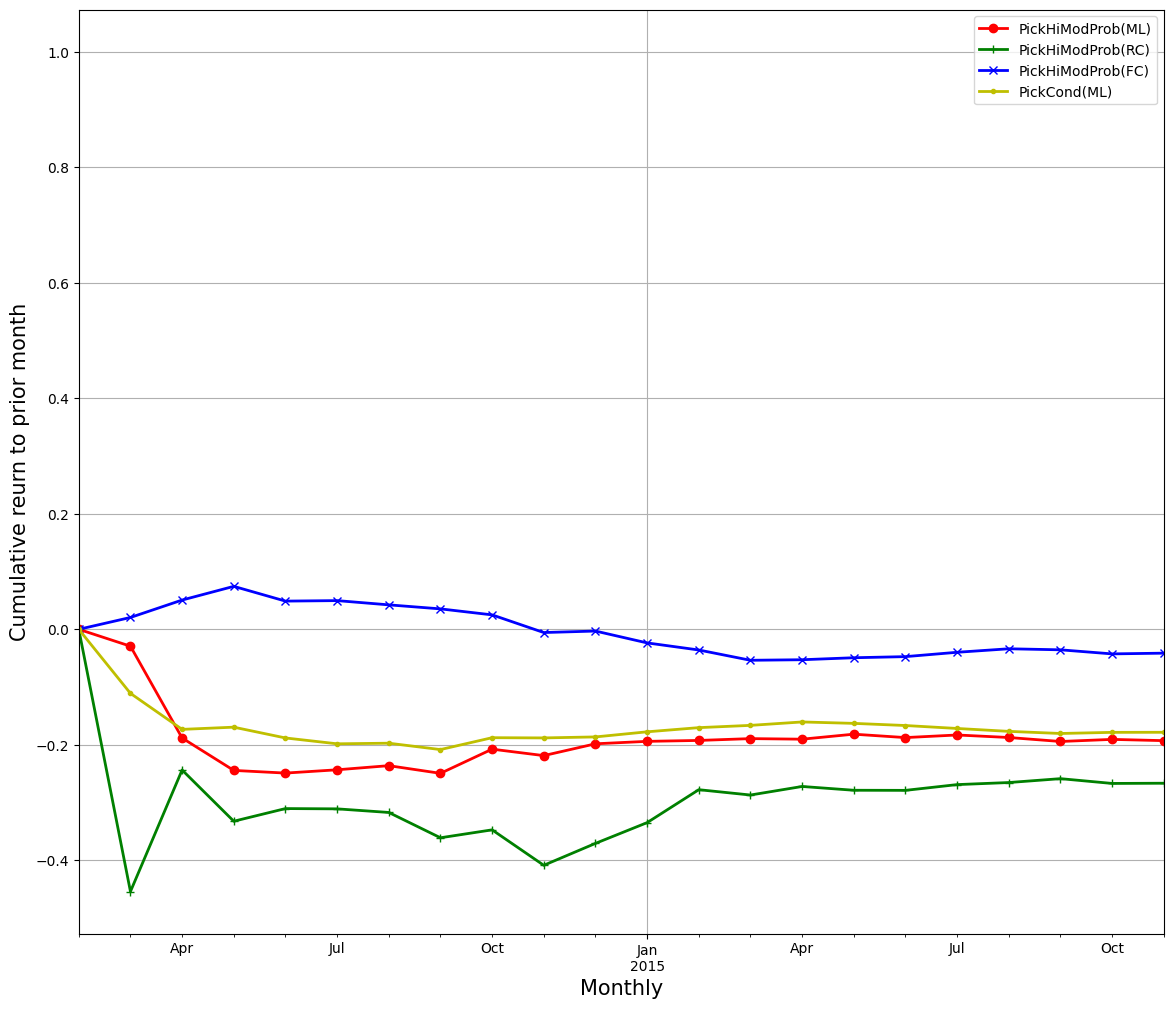

In [183]:
my_strategy_assessment.plot_cumulative_return()

In [184]:
my_strategy_assessment.monthly_assessment['PickHiModProb(ML)']

,as_of,strat_stake,strat_payoff,strat_ret,strat_stake_cumsum,strat_payoff_cumsum,strat_cumret
0,2014-02-01,0.0,0.00,0.000000,0.0,0.00,0.000000
1,2014-03-01,269.0,261.14,-0.029219,269.0,261.14,-0.029219
2,2014-04-01,281.0,185.40,-0.340214,550.0,446.54,-0.188109
3,2014-05-01,197.0,118.05,-0.400761,747.0,564.59,-0.244190
4,2014-06-01,76.0,53.65,-0.294079,823.0,618.24,-0.248797
5,2014-07-01,87.0,70.53,-0.189310,910.0,688.77,-0.243110
6,2014-08-01,81.0,68.39,-0.155679,991.0,757.16,-0.235964
7,2014-09-01,147.0,97.20,-0.338776,1138.0,854.36,-0.249244
8,2014-10-01,153.0,168.89,0.103856,1291.0,1023.25,-0.207397
9,2014-11-01,211.0,150.46,-0.286919,1502.0,1173.71,-0.218569


In [185]:
my_strategy_assessment.monthly_assessment['PickCond(ML)']

,as_of,strat_stake,strat_payoff,strat_ret,strat_stake_cumsum,strat_payoff_cumsum,strat_cumret
0,2014-02-01,0.0,0.00,0.000000,0.0,0.00,0.000000
1,2014-03-01,545.0,484.60,-0.110826,545.0,484.60,-0.110826
2,2014-04-01,637.0,492.73,-0.226484,1182.0,977.33,-0.173156
3,2014-05-01,445.0,374.15,-0.159213,1627.0,1351.48,-0.169342
4,2014-06-01,149.0,90.61,-0.391879,1776.0,1442.09,-0.188012
5,2014-07-01,146.0,99.08,-0.321370,1922.0,1541.17,-0.198143
6,2014-08-01,121.0,99.19,-0.180248,2043.0,1640.36,-0.197083
7,2014-09-01,236.0,164.34,-0.303644,2279.0,1804.70,-0.208118
8,2014-10-01,205.0,213.38,0.040878,2484.0,2018.08,-0.187568
9,2014-11-01,253.0,204.54,-0.191542,2737.0,2222.62,-0.187936
